Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It is used to get better understanding and find out the important insights.  

here, i am gonna work on fifa dataset and find out few characteristics like:-

* foot preference of FIFA players
* Weight of Professional Soccer Players in kg
* Team Comparison

At the end, we are making a WordCloud

# fifa -> EDA  (dataset from kaggle)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

path = "/content/drive/My Drive/"
csv_file = path + 'dataset/fifa_data.csv'
data = pd.read_csv(csv_file)
data.head()



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [12]:
data.shape

(18207, 89)

# Find out foot preference of FIFA players

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64


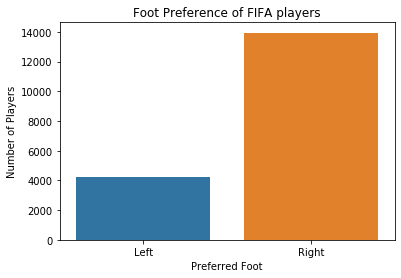

In [13]:
print(data["Preferred Foot"].value_counts())
fig, ax = plt.subplots()
sns.countplot(data["Preferred Foot"])
ax.set_title("Foot Preference of FIFA players")
ax.set_ylabel("Number of Players")
plt.show() 

# Find out Weight of Professional Soccer Players in kg

In [14]:
#check for any null values first
print(data["Weight"].isnull().sum())

48


In [15]:
#i replace the null values with -99 but you can use mean, median or any other value according to you
data["Weight"].fillna(-99, inplace=True)
data["Weight"].isnull().sum()

0

In [0]:
import re
length = len(data["Weight"])
data_kgs=[]
for i in range(length):
    try:
        output = re.sub(r'\D+','',str(data.loc[i]["Weight"]))
        result = round(float(output)*0.45359237, 2)
        data_kgs.append(result)
    except ValueError:
        break


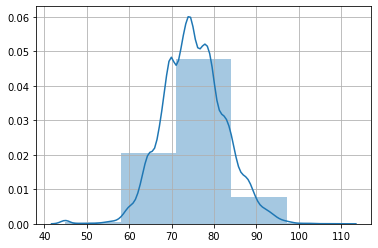

In [17]:
#Plot histogram
sns.distplot(data_kgs, kde=True, bins=5)
plt.grid(True)
plt.show()

In [18]:
data["Weight"] = data_kgs
Weight_plot = data["Weight"].value_counts(bins=5).sort_index()
Weight_plot

Weight_plot= Weight_plot.reset_index()
Weight_plot.columns = [ "weight_kgs", "count"]
Weight_plot

Weight_plot.index=("light", "light_medium", "medium", "medium_heavy", "heavy")
Weight_plot


,weight_kgs,count
light,"(44.844, 57.972]",103
light_medium,"(57.972, 71.034]",4881
medium,"(71.034, 84.096]",11348
medium_heavy,"(84.096, 97.158]",1847
heavy,"(97.158, 110.22]",28


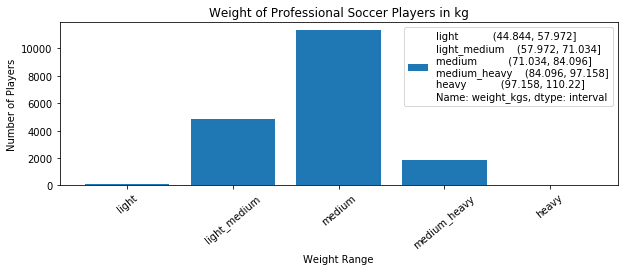

In [19]:
plt.figure(figsize=(10,3))
plt.bar(Weight_plot.index,Weight_plot['count'], label=Weight_plot["weight_kgs"])
plt.xticks(rotation=40)
plt.legend()
plt.title("Weight of Professional Soccer Players in kg")
plt.xlabel("Weight Range")
plt.ylabel("Number of Players")
plt.show()

# Professional Soccer Team Comparison

In [20]:
Club_performance = data.groupby("Club")["Overall"]
Club_performance.describe().sort_values(by ="mean", ascending= False).head(5)  #all stats values

,count,mean,std,min,25%,50%,75%,max
Club,,,,,,,,
Juventus,25.0,82.280000,6.560742,62.0,80.0,84.0,86.00,94.0
Napoli,25.0,80.000000,4.645787,70.0,77.0,81.0,83.00,88.0
Inter,24.0,79.750000,5.704689,64.0,77.5,81.0,84.25,88.0
Real Madrid,33.0,78.242424,9.902747,62.0,67.0,80.0,87.00,91.0
Milan,27.0,78.074074,4.945285,66.0,76.0,79.0,82.00,88.0


In [21]:
Best_Teams = Club_performance.mean().sort_values(ascending=False).head(2)
Worst_Team = Club_performance.mean().sort_values(ascending=False).tail(1)
print(f"Best Teams: {list(Best_Teams.index)}")
print(f"Worst Team: {list(Worst_Team.index)}")

Best Teams: ['Juventus', 'Napoli']
Worst Team: ['Bray Wanderers']


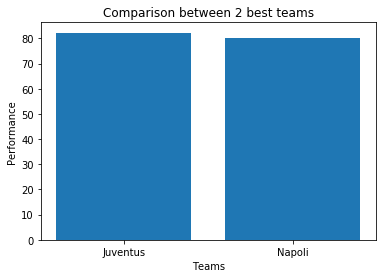

In [22]:
fig, ax = plt.subplots()
ax.bar(Best_Teams.index, Best_Teams.values)
ax.set_title("Comparison between 2 best teams")
ax.set_xlabel("Teams")
ax.set_ylabel("Performance")
plt.show()


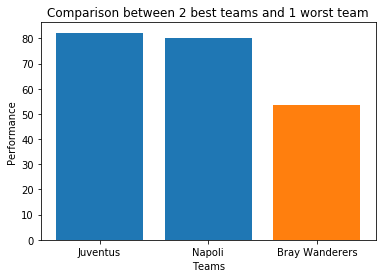

In [23]:
fig, ax = plt.subplots()
ax.bar(Best_Teams.index, Best_Teams.values)
ax.bar(Worst_Team.index, Worst_Team.values)
ax.set_title("Comparison between 2 best teams and 1 worst team")
ax.set_xlabel("Teams")
ax.set_ylabel("Performance")
plt.show()


# Its time to work on wordcloud 

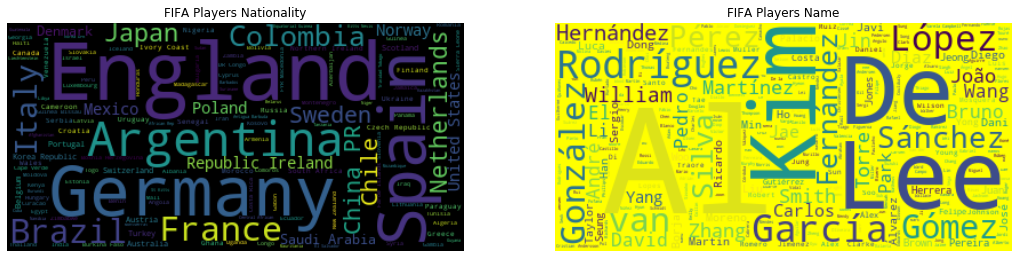

In [24]:
nationality = " ".join(review for review in data.Nationality)
name = " ".join(review for review in data.Name)
from wordcloud import WordCloud
fig= plt.figure(figsize=(18,7))
ax0= fig.add_subplot(1,2,1)
ax1= fig.add_subplot(1,2,2)

wordcloud1 = WordCloud(max_words=10000,  
                      contour_width = 3, 
                      contour_color= 'black', 
                      background_color="black").generate(nationality)

wordcloud2 = WordCloud(max_words=10000,  
                      contour_width = 3, 
                      contour_color= 'black', 
                      background_color="yellow").generate(name)

ax0.imshow(wordcloud1, interpolation='bilinear')
ax1.imshow(wordcloud2, interpolation='bilinear') 

ax0.axis("off")
ax1.axis("off")
ax0.set_title("FIFA Players Nationality")
ax1.set_title("FIFA Players Name")
plt.show()

Comments, I am only work on few characteristics of FIFA DataSet but you can find out more for yourself and i am using a simple approach for making a wordcloud but it can be more beautiful, if we are using images. 